# <div style="text-align:center"> DS7333 - Case Study 2 | Real-Time Location System</div>
### <div style="text-align:center">Andy Ho, An Nguyen, Jodi Pafford</div>
<div style="text-align:center">May 18, 2019</div>

## 1 Introduction
In this case study, we will be analyzing the RTLS data set using the k-nearest neighbors to determine locations and to determine potential issues with decisions made regarding the use, and non-use, of the data. We will conduct a more thorough data analysis into these two MAC addresses (00:0f:a3:39:e1:c0 and 00:0f:a3:39:dd:cd) determining locations by using data corresponding to both MAC addresses.  The following questions will be answered:
    - Which of these two MAC addresses should be used and which should not be used for RTLS?
    - Which MAC address yields the best prediction of location?
    - Does using data for both MAC addresses simultaneously yield more, or less, accurate prediction of location?
    
Furthermore, while k-nearest neighbors has proven to be a good approach to determining location, alternate approaches have been proposed.  One simple alternative approach is to use weights on the received signal strength, where the weight is inversely proportional to the “distance” from the test observation.  This allows for the “nearest” points to have a greater contribution to the k-nearest neighbor location calculation than the points that are “further” away.  We will implement  this alternative prediction method to answer:
    - For what range of values of weights are you able to obtain better prediction values than for the unweighted k-nearest neighbor approach?
    
Note: If this notebook is re-ran, the plot in section 4 will be missing.  To have it reappear, be sure to run the R code for the plot after the notebook as completely been ran. 

## 2 Background

Indoor Global positioning systems (GPS) are typically not reliable due to their inability to communicate with satalites. However, with the use of a wireless local area network (LAN), the GPS systems can be more reliable.  Routers must be placed in key locations in order to create an optinmal environment. In order to locate the key locations, we will use the CRAWDAD site (A Community Resource for Archiving Wireless Data At Dartmouth) to test the environment for key locations.

In this layout there are 6 access points within a 15 meter by 36 meter floorplan. We will use the (x,y) coordinates of the access points and document the 110 signal strength measurements from various media access control (MAC) devices. These measurements were taken from 166 points spaced 1 meter apart.

The purpose of this analysis is to ensure that our placement of signals is in an optimal place in order to serve our customers in the best way possible.

## 3 Methods

The initial dataset was prepared for this analysis by the method provided by the Nolan and Lang text, "Data Sicne in R".  Following the preparation of the dataset, K Neigherst N

## 4 Results

The prediction error will vary based on the value of K whether it's keeping both MAC addresses, removing one of the MAC Addresses, and/or if the KNN model is weighted or unweighted.  The chart below uses K values from the range of 1 to 15 to arrive at the result for each of the scenarios listed. 

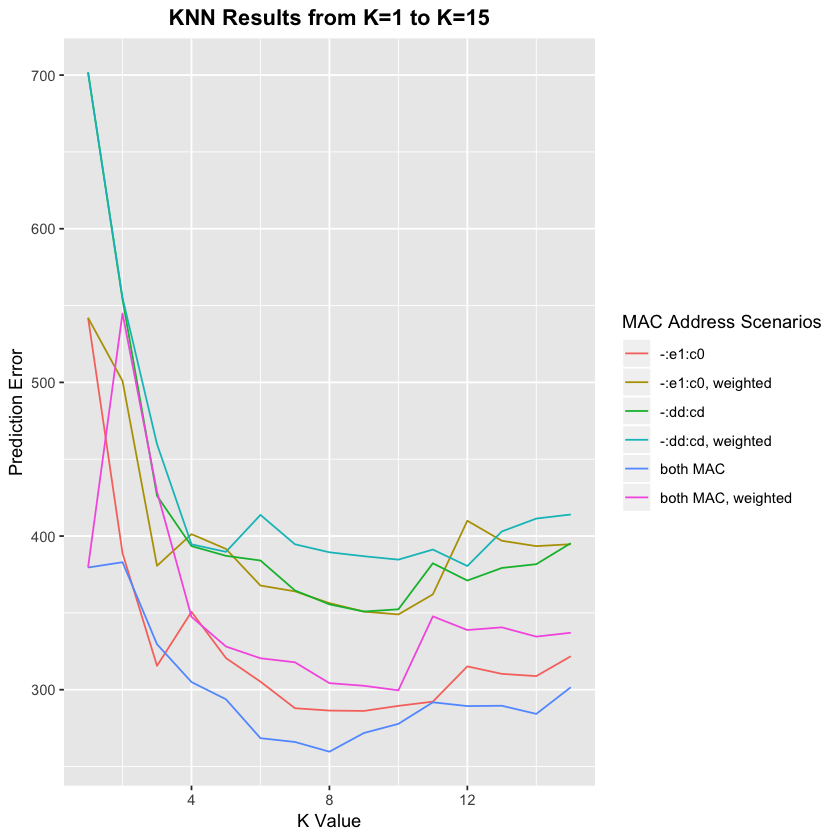

In [107]:
#plot errors, kNN using both MAC address with an k of 8 is the best
ggplot(errors, aes(x=k, y=error, colour=variable)) + geom_line() + labs(color='MAC Address Scenarios') + ggtitle("KNN Results from K=1 to K=15") +  xlab("K Value") + ylab("Prediction Error") + theme(plot.title = element_text(lineheight=.8, hjust = '0.5',face="bold"))

## 5 Conclusion

## 6 Appendix - Code
In this section, we'll use the offline.final.trace.txt and online.final.trace.txt data sets from http://rdatasciencecases.org to process, clean and build, explore, and analyze for the purposes of this assignment.  The code itself is directly from the textbook/website.

### 6.1 Process RAW Data

In [81]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [82]:
options (digits = 2)

#Read in Offline Trace File
txt = readLines("offline.final.trace.txt")

#Locate lines that start with '#' 
print(paste("Number of lines that are comments:", sum(substr(txt, 1, 1) == "#"), "out of", length(txt), "lines."))

[1] "Number of lines that are comments: 5312 out of 151392 lines."


In [83]:
#Update processLine function to discard obseravations causing warnings.  line 82 had an warning...replaced with 'ncol ='
processLine = function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
  
  if (length(tokens) == 10) 
    return(NULL)
 
  tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)
  cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6, 
               byrow = TRUE), tmp)
}

#running with updated processLines and store output to offline
options(error = recover, warn = 1)
lines = txt[ substr(txt, 1, 1) != "#" ]
tmp = lapply(lines, processLine)
offline = as.data.frame(do.call("rbind", tmp), 
                        stringsAsFactors = FALSE)

print(paste("\"Offline\" data frame has", dim(offline)[1], "observations and", dim(offline)[2], "variables."), quote=FALSE)

[1] "Offline" data frame has 1181628 observations and 10 variables.


### 6.2 Clean and Build the RAW Data

In [84]:
#Adding headers to each column to 'offline' dataframe
names(offline) = c("time", "scanMac", "posX", "posY", "posZ", 
                   "orientation", "mac", "signal", 
                   "channel", "type")

#Convert position, signal, and time variable sto numeric
numVars = c("time", "posX", "posY", "posZ", 
            "orientation", "signal")
offline[ numVars ] =  lapply(offline[ numVars ], as.numeric)

#Drop all records for adhoc measurements and remove the 'type' variable from dataframe
offline = offline[ offline$type == "3", ]
offline = offline[ , "type" != names(offline) ]
print(paste("\"Offline\" data frame has", dim(offline)[1], "observations and", dim(offline)[2], "variables."), quote=FALSE)

#Convert the time to seconds from milliseconds
offline$rawTime = offline$time
offline$time = offline$time/1000
class(offline$time) = c("POSIXt", "POSIXct")

#Checking the types of variables in the data frame
print("Variable names and their types:")
unlist(lapply(offline, class))

#Summary of each numerica value
print("Summary of each variables:")
summary(offline[, numVars])

#Convert the character variable to factors
summary(sapply(offline[ , c("mac", "channel", "scanMac")],
                as.factor))

#modify dataframe by removing scanMac and PosZ
offline = offline[ , !(names(offline) %in% c("scanMac", "posZ"))]

[1] "Offline" data frame has 978443 observations and 9 variables.
[1] "Variable names and their types:"


time1       time2     scanMac        posX        posY        posZ 
   "POSIXt"   "POSIXct" "character"   "numeric"   "numeric"   "numeric" 
orientation         mac      signal     channel     rawTime 
  "numeric" "character"   "numeric" "character"   "numeric"

[1] "Summary of each variables:"


      time                          posX         posY           posZ  
 Min.   :2006-02-10 23:31:58   Min.   : 0   Min.   : 0.0   Min.   :0  
 1st Qu.:2006-02-11 05:21:27   1st Qu.: 2   1st Qu.: 3.0   1st Qu.:0  
 Median :2006-02-11 11:57:58   Median :12   Median : 6.0   Median :0  
 Mean   :2006-02-16 06:57:37   Mean   :14   Mean   : 5.9   Mean   :0  
 3rd Qu.:2006-02-19 06:52:40   3rd Qu.:23   3rd Qu.: 8.0   3rd Qu.:0  
 Max.   :2006-03-09 12:41:10   Max.   :33   Max.   :13.0   Max.   :0  
  orientation      signal   
 Min.   :  0   Min.   :-99  
 1st Qu.: 90   1st Qu.:-69  
 Median :180   Median :-60  
 Mean   :167   Mean   :-62  
 3rd Qu.:270   3rd Qu.:-53  
 Max.   :360   Max.   :-25  

                mac               channel                    scanMac      
 00:0f:a3:39:e1:c0:145862   2462000000:189774   00:02:2D:21:0F:33:978443  
 00:0f:a3:39:dd:cd:145619   2437000000:152124                             
 00:14:bf:b1:97:8a:132962   2412000000:145619                             
 00:14:bf:3b:c7:c6:126529   2432000000:126529                             
 00:14:bf:b1:97:90:122315   2427000000:122315                             
 00:14:bf:b1:97:8d:121325   2442000000:121325                             
 (Other)          :183831   (Other)   :120757                             

In [85]:
print("First 6 observations in dataframe.")
head(offline)

[1] "First 6 observations in dataframe."


time,posX,posY,orientation,mac,signal,channel,rawTime
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.1e+12
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.1e+12
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.1e+12
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.1e+12
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.1e+12
2006-02-10 23:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.1e+12


### 6.3 Explore the Data

[1] "There are 12 unique MAC addresses and 8 channels."
[1] "Amount of times each MAC address was pinged:"



00:04:0e:5c:23:fc 00:0f:a3:39:dd:cd 00:0f:a3:39:e0:4b 00:0f:a3:39:e1:c0 
              418            145619             43508            145862 
00:0f:a3:39:e2:10 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
            19162            126529            120339            132962 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 00:30:bd:f8:7f:c5 00:e0:63:82:8b:a9 
           121325            122315               301               103 

00:0f:a3:39:dd:cd 00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 
                1                 1                 1                 1 
00:14:bf:b1:97:8a 00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1                 1

[1] "There are 476 receiverss."
[1] "There are 166 receivers that detected a signal."
[1] "First 8 receivers with total number of observations:"


posX,0,1,2,0,1,2,0,1
posY,0,0,0,1,1,1,2,2
count,5505,5505,5506,5524,5543,5558,5503,5564


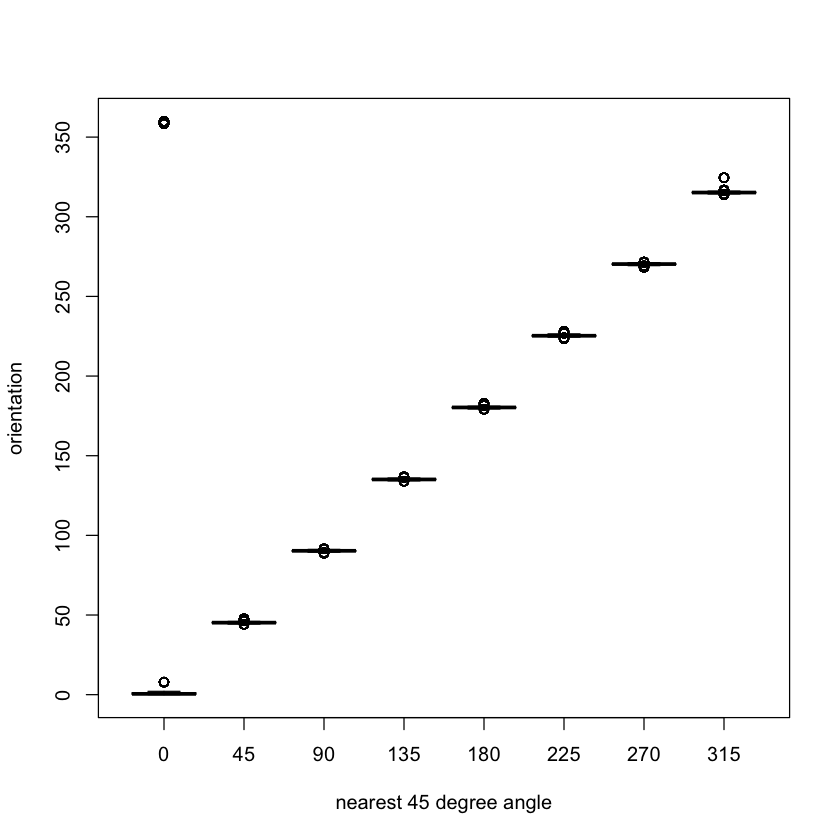

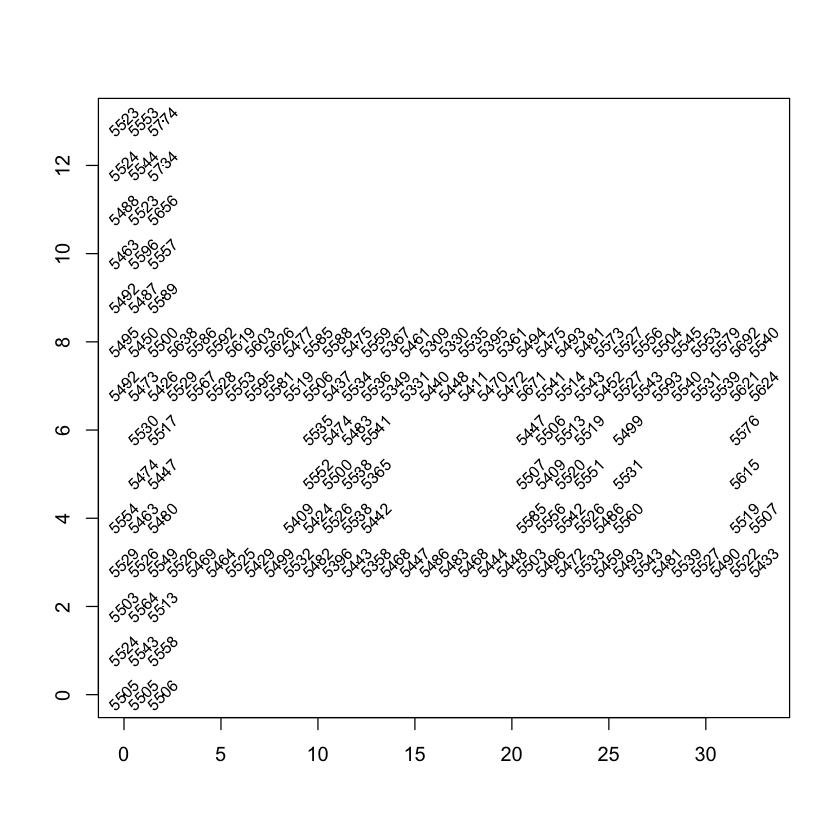

In [86]:
#RoundOrientation Function
roundOrientation = function(angles) {
  refs = seq(0, by = 45, length  = 9)
  q = sapply(angles, function(o) which.min(abs(o - refs)))
  c(refs[1:8], 0)[q]
}

#create rounded angles
offline$angle = roundOrientation(offline$orientation)
with(offline, boxplot(orientation ~ angle,
                      xlab = "nearest 45 degree angle",
                      ylab="orientation"))

#number of unique addresses and channels.  There should only be 6 access points
print(paste("There are", length(unique(offline$mac)), "unique MAC addresses and", 
            length(unique(offline$channel)), "channels."))
             
print("Amount of times each MAC address was pinged:")             
table(offline$mac)

#keeping the records form top 7 devices
subMacs = names(sort(table(offline$mac), decreasing = TRUE))[1:7]
offline = offline[ offline$mac %in% subMacs, ]
             
#reate a table of counts for the remaining MAC×channel combinations and confirm there is one non-zero entry in each row
macChannel = with(offline, table(mac, channel))
apply(macChannel, 1, function(x) sum(x > 0))

#remove channel from offline
offline = offline[ , "channel" != names(offline)]
      
#a list containing a data frame for each location 
locDF = with(offline,
             by(offline, list(posX, posY), function(x) x))
print(paste("There are", length(locDF), "receiverss."))

#drop unneeded elements
locDF = locDF[ !sapply(locDF, is.null) ]
print(paste("There are", length(locDF), "receivers that detected a signal."))
                
#number of observation at each location
locCounts = sapply(locDF, nrow)
locCounts = sapply(locDF,
                   function(df)
                     c(df[1, c("posX", "posY")], count = nrow(df)))
                   
print("First 8 receivers with total number of observations:")
locCounts[ , 1:8]
                   
#plot the 166 counts
locCounts = t(locCounts)
plot(locCounts, type = "p", xlab = "", ylab = "", pch=".")
text(locCounts, labels = locCounts[,3], cex = 0.8, srt = 45)

In [87]:
#create a function to summarize all that was done above
readData = 
  function(filename = 'offline.final.trace.txt', 
           subMacs = c("00:0f:a3:39:e1:c0", "00:0f:a3:39:dd:cd", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt = readLines(filename)
    lines = txt[ substr(txt, 1, 1) != "#" ]
    tmp = lapply(lines, processLine)
    offline = as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline) = c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
     # keep only signals from access points
    offline = offline[ offline$type == "3", ]
    
    # drop scanMac, posZ, channel, and type - no info in them
    dropVars = c("scanMac", "posZ", "channel", "type")
    offline = offline[ , !( names(offline) %in% dropVars ) ]
    
    # drop more unwanted access points
    offline = offline[ offline$mac %in% subMacs, ]
    
    # convert numeric values
    numVars = c("time", "posX", "posY", "orientation", "signal")
    offline[ numVars ] = lapply(offline[ numVars ], as.numeric)

    # convert time to POSIX
    offline$rawTime = offline$time
    offline$time = offline$time/1000
    class(offline$time) = c("POSIXt", "POSIXct")
    
    # round orientations to nearest 45
    offline$angle = roundOrientation(offline$orientation)
      
    return(offline)
  }
offlineRedo = readData()

print("\"readData\" function creates the same dataframe as manual operation.", quote=FALSE)
identical(offline, offlineRedo) 

[1] "readData" function creates the same dataframe as manual operation.


[1] TRUE

### 6.4 Signal Strength Analysis

[1] "Summary of signal strength from all receivers:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    -98     -67     -59     -60     -53     -25 

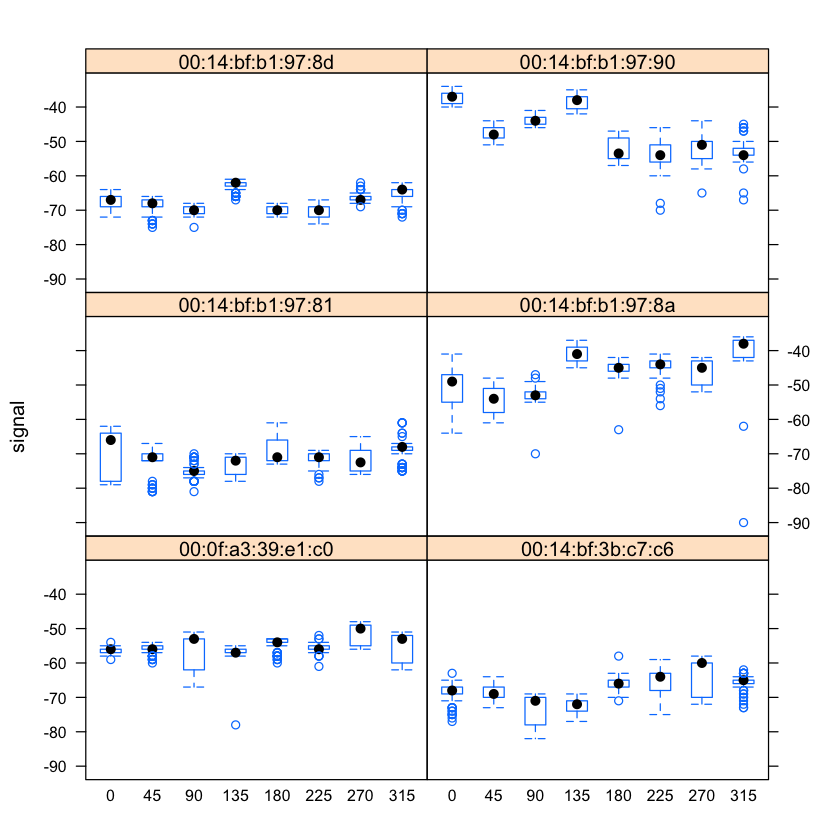

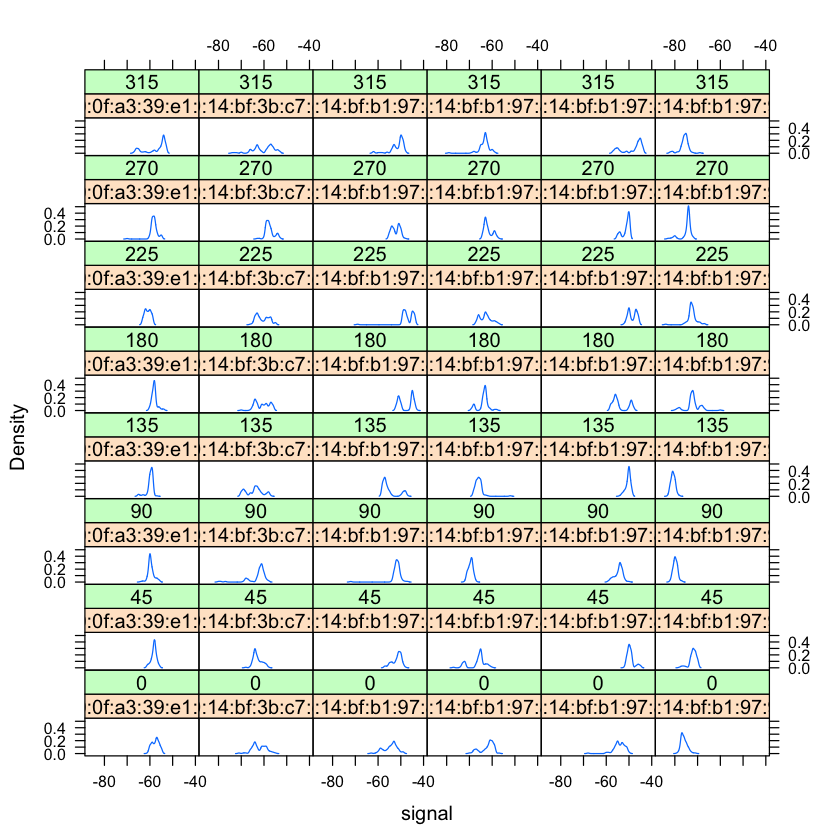

In [88]:
library(codetools)
##findGlobals(readData, merge = FALSE)$variables

library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offline,
       subset = posX == 2 & posY == 12
                & mac != "00:0f:a3:39:dd:cd",
       layout = c(2,3))

print("Summary of signal strength from all receivers:")
summary(offline$signal)

densityplot( ~ signal | mac + factor(angle), data = offline,
             subset = posX == 24 & posY == 4 &
                         mac != "00:0f:a3:39:dd:cd",
             bw = 0.5, plot.points = FALSE)

In [89]:
offline$posXY = paste(offline$posX, offline$posY, sep = "-")

byLocAngleAP = with(offline,
                    by(offline, list(posXY, angle, mac),
                       function(x) x))

signalSummary =
  lapply(byLocAngleAP,
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })
             
offlineSummary = do.call("rbind", signalSummary)

### 6.5 Prediction Analysis

In [90]:
# Read in data from online.final.trace.txt file
macs = unique(offlineSummary$mac)
online = readData("online.final.trace.txt", subMacs = macs)

#Create unique location identifier
online$posXY = paste(online$posX, online$posY, sep = "-")

#Confirm there is 60 unique test locations
print(paste("There are ", length(unique(online$posXY)), "test locations."))

tabonlineXYA = table(online$posXY, online$angle)
tabonlineXYA[1:6, ]

#summarize readings from 'online' receivers, test data set.
keepVars = c("posXY", "posX","posY", "orientation", "angle") 
byLoc = with(online, by(online, 
                        list(posXY), function(x) {
                            ans = x[1, keepVars] 
                            avgSS = tapply(x$signal, x$mac, mean) 
                            y = matrix(avgSS, nrow = 1, ncol = 7, 
                                       dimnames = list(ans$posXY, names(avgSS)))
                            cbind(ans, y) }))
onlineSummary = do.call("rbind", byLoc)

[1] "There are  60 test locations."


            
               0  45  90 135 180 225 270 315
  0-0.05       0   0   0 704   0   0   0   0
  0.15-9.42    0   0 717   0   0   0   0   0
  0.31-11.09   0   0   0   0   0 684   0   0
  0.47-8.2   701   0   0   0   0   0   0   0
  0.78-10.94 695   0   0   0   0   0   0   0
  0.93-11.69   0   0   0   0 691   0   0   0

In [91]:
#reshapes offlineSummary to match onlineSummary
reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY", "orientation", "angle")) { 
    byLocation = 
      with(data, by(data, list(posXY), 
                    function(x) { ans = x[1, keepVars] 
                                  avgSS = tapply(x[ , varSignal ], x$mac, mean) 
                                  y = matrix(avgSS, nrow = 1, ncol = length(unique(data$mac)), 
                                             dimnames = list(ans$posXY, names(avgSS))) 
                                 cbind(ans, y)}))
      newDataSS = do.call("rbind", byLocation) 
      return(newDataSS)}

#find nearest neighbors
findNN = function(newSignal, trainSubset) { 
    diffs = apply(trainSubset[ , 6:length(trainSubset)], 1, 
                  function(x) x - newSignal) 
    dists = apply(diffs, 2, function(x) sqrt(sum(x^2)) )              
    closest = order(dists)
    wgts = closest/length(closest)
    return(cbind(trainSubset[closest, 1:3 ], wgts)) }              
                  
#select all offline receivers with angles similar to test receiver and reshape training data set
#into a shape simiolar to test set.
selectTrain = function(angleNewObs, signals, m) {
    refs = seq(0, by = 45, length = 8) 
    nearestAngle = roundOrientation(angleNewObs)
    if (m %% 2 == 1) { 
        angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m) } 
    else { m = m + 1 
           angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m) 
           if (sign(angleNewObs - nearestAngle) > -1) 
               angles = angles[ -1 ] 
           else 
               angles = angles[ -m ] }
    subset = signals[ signals$angle %in% angles, ]
    trainSS = reshapeSS(subset, varSignal = "avgSignal")
    return(trainSS)
}
                  
#prediction function
predXY = function(newSignals, newAngles, trainData, numAngles = 3, k = 5){
    closeXY = list(length = nrow(newSignals))
    for (i in 1:nrow(newSignals)) {
        trainSS = selectTrain(newAngles[i], trainData, m = numAngles) 
        closeXY[[i]] = 
            findNN(newSignal = as.numeric(newSignals[i, ]), trainSS) } 
    estXY = lapply(closeXY, function(x) sapply(x[ , 2:3], 
                                      function(x) mean(x[1:k])))
    estXY_wgts = lapply(closeXY, function(x) sapply(x[ , 2:3], 
                                      function(x,y=closeXY[[]][,4]) weighted.mean(x[1:k], y[1:k]))) 
    estXY = do.call("rbind", estXY)
    estXY_wgts = do.call("rbind", estXY_wgts)
    estXY = cbind(estXY, estXY_wgts)
    return(estXY)}
                                        
#error function to compare the three predictions.
calcError = function(estXY, actualXY) 
    sum( rowSums( (estXY - actualXY)^2) )

In [92]:
library(reshape2)

MAC_2_remove = c("00:0f:a3:39:e1:c0", "00:0f:a3:39:dd:cd")
max_k = 15
errors = c()

for (k in 1:max_k){
    #error_ = c()
    error_ = k
    #cycle through list of MAC addresses to remove
    for (m in 1:(length(MAC_2_remove)+1)) {
        if (m <= length(MAC_2_remove)) {
            testSet = onlineSummary[ , -which(names(onlineSummary) %in% MAC_2_remove[m])]
            trainSet = subset(offlineSummary, mac != MAC_2_remove[m])
        }
        else {
            testSet = onlineSummary
            trainSet = offlineSummary
        }
        
        #prediction algorithm
        estXY = predXY(newSignals = testSet[ , 6:length(testSet)], 
                 newAngles = testSet[ , 4], 
                 trainSet, numAngles = 3, k = k) 
        
        #error calculation
        actualXY = onlineSummary[ , c("posX", "posY")]
        error = sapply(list(estXY[,1:2], estXY[,3:4]), calcError, actualXY)
        error_ = c(error_, error)
    }
    errors = rbind(errors, error_)
}

In [93]:
errors

error_,1,542,542,702,702,380,380
error_,2,389,501,554,555,383,545
error_,3,316,381,426,460,330,429
error_,4,351,401,393,395,305,347
error_,5,321,392,387,390,294,328
error_,6,305,368,384,414,268,320
error_,7,288,364,365,395,266,318
error_,8,286,356,356,389,260,304
error_,9,286,351,351,387,272,303
error_,10,289,349,352,385,278,300
error_,11,292,362,382,391,292,348


In [94]:
#reshape error output into a dataframe for ggplot
errors = data.frame(errors)
colnames(errors) = c("k","-:e1:c0", "-:e1:c0, weighted", "-:dd:cd", "-:dd:cd, weighted", "both MAC", "both MAC, weighted")
#errors$k = as.numeric(row.names(errors))
errors = melt(errors, value.name="error", id.vars="k")
errors

k,variable,error
1,-:e1:c0,542
2,-:e1:c0,389
3,-:e1:c0,316
4,-:e1:c0,351
5,-:e1:c0,321
6,-:e1:c0,305
7,-:e1:c0,288
8,-:e1:c0,286
9,-:e1:c0,286
10,-:e1:c0,289


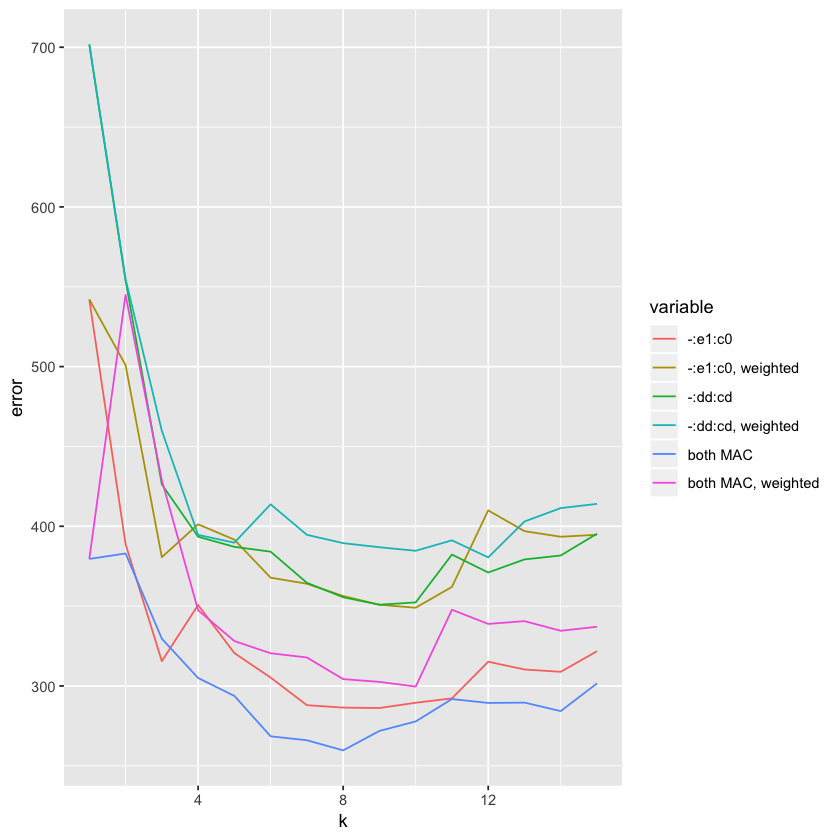

In [95]:
library(ggplot2)

#plot errors, kNN using both MAC address with an k of 8 is the best
ggplot(errors, aes(x=k, y=error, colour=variable)) + geom_line()